### Code attribution

* Copyright (c) Barba group
* Github page: [CFDPython](https://github.com/barbagroup/CFDPython)
* Text provided under a [Creative Commons Attribution license, CC-BY](http://creativecommons.org/licenses/by/3.0/)
* Code modified by Bjorn Sandstede under CC-BY license 

### Simulating flow in lid-driven cavity using the Navier-Stokes equations
We will explore the dynamics of an incompressible fluid in a two-dimensional closed box whose top lid moves with constant velocity to the right as indicated in the following schematic figure:

![Lid-driven cavity flow](data:image/svg+xml,%3Csvg%20version%3D%221.1%22%20viewBox%3D%22110%2C164%2C212%2C198%22%20width%3D%22212%22%20height%3D%22198%22%20xmlns%3D%22http%3A%2F%2Fwww.w3.org%2F2000%2Fsvg%22%20xmlns%3Axlink%3D%22http%3A%2F%2Fwww.w3.org%2F1999%2Fxlink%22%3E%3Cg%3E%3Cpath%20fill%3D%22%23bee3ff%22%20stroke%3D%22%23000100%22%20stroke-width%3D%223%22%20d%3D%22M144.75%2C216.25%20L287.75%2C216.25%20L287.75%2C359.75%20L144.75%2C359.75%20L144.75%2C216.25%20Z%22%2F%3E%3Cpath%20fill%3D%22%234c4c4c%22%20stroke%3D%22%23000100%22%20d%3D%22M136%2C203%20C136%2C206.866%2C132.866%2C210%2C129%2C210%20C125.134%2C210%2C122%2C206.866%2C122%2C203%20C122%2C199.134%2C125.134%2C196%2C129%2C196%20C132.866%2C196%2C136%2C199.134%2C136%2C203%20Z%22%2F%3E%3Cpath%20fill%3D%22%234c4c4c%22%20stroke%3D%22%23000100%22%20d%3D%22M309.75%2C203%20C309.75%2C206.866%2C306.616%2C210%2C302.75%2C210%20C298.884%2C210%2C295.75%2C206.866%2C295.75%2C203%20C295.75%2C199.134%2C298.884%2C196%2C302.75%2C196%20C306.616%2C196%2C309.75%2C199.134%2C309.75%2C203%20Z%22%2F%3E%3Cpath%20fill%3D%22none%22%20stroke%3D%22%234c4c4c%22%20stroke-width%3D%225%22%20d%3D%22M113.125%2C195.05%20C113.125%2C192.123%2C115.498%2C189.75%2C118.425%2C189.75%20L314.075%2C189.75%20C317.002%2C189.75%2C319.375%2C192.123%2C319.375%2C195.05%20L319.375%2C210.95%20C319.375%2C213.877%2C317.002%2C216.25%2C314.075%2C216.25%20L118.425%2C216.25%20C115.498%2C216.25%2C113.125%2C213.877%2C113.125%2C210.95%20Z%22%2F%3E%3Ctext%20fill%3D%22%23000100%22%20font-family%3D%22Helvetica%22%20font-size%3D%2218%22%20transform%3D%22matrix%281%2C0%2C0%2C1%2C194.743%2C355.25%29%22%20xml%3Aspace%3D%22preserve%22%3E%3Ctspan%3EWalls%3C%2Ftspan%3E%3C%2Ftext%3E%3Ctext%20fill%3D%22%231e00ff%22%20font-family%3D%22Helvetica%22%20font-size%3D%2218%22%20transform%3D%22matrix%281%2C0%2C0%2C1%2C196.562%2C283.75%29%22%20xml%3Aspace%3D%22preserve%22%3E%3Ctspan%3EFluid%3C%2Ftspan%3E%3C%2Ftext%3E%3Ctext%20fill%3D%22%234c4c4c%22%20font-family%3D%22Helvetica%22%20font-size%3D%2218%22%20transform%3D%22matrix%281%2C0%2C0%2C1%2C124.173%2C182.25%29%22%20xml%3Aspace%3D%22preserve%22%3E%3Ctspan%3EMoving%20lid%3C%2Ftspan%3E%3C%2Ftext%3E%3Cg%3E%3Cpath%20fill%3D%22%234c4c4c%22%20d%3D%22M229.523%2C198.295%20L209.625%2C190.045%20L229.724%2C182.296%20C225.168%2C186.739%2C225.08%2C193.739%2C229.523%2C198.295%22%2F%3E%3C%2Fg%3E%3Cg%3E%3Cpath%20fill%3D%22%234c4c4c%22%20d%3D%22M209.728%2C208.501%20L229.827%2C216.25%20L209.929%2C224.5%20C214.372%2C219.944%2C214.285%2C212.944%2C209.728%2C208.501%22%2F%3E%3C%2Fg%3E%3C%2Fg%3E%3C%2Fsvg%3E)

The movie below shows an experiment of lid-driven cavity flow.

In [1]:
import IPython
IPython.display.IFrame(src="https://www.youtube.com/embed/Ma3NoxRRM7w",width="560", height="315")

The model we use is the Navier-Stokes equations for the fluid velocity $(u,v)(x,y,t)$ and the pressure $p(x,y,t)$ at position $(x,y)$ and time $t$ in a fluid of density $\rho$ and viscosity $D$. These equations are given by
$$
\begin{align}
\rho( u_t + u u_x + v u_y ) & = - p_x + D (u_{xx}+u_{yy}) \\
\rho( v_t + u v_x + v v_y ) & = - p_y + D (v_{xx}+v_{yy}) \\
u_x + v_y & = 0
\end{align}
$$
with appropriate boundary and initial conditions. We will also follow individual particles in the fluid and trace out their trajectories as time changes.

In [2]:
# Importing modules
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import interpn

# Defining geometry
nx = 101
ny = 101
nt = 500
nit = 50
c = 1
dx = 2 / (nx - 1)
dy = 2 / (ny - 1)
x = np.linspace(0, 2, nx)
y = np.linspace(0, 2, ny)
X, Y = np.meshgrid(x, y)

# Defining parameters
rho = 1
nu = 0.1
dt = 0.0001

# Initializing arrays
u = np.zeros((ny, nx))
v = np.zeros((ny, nx))
p = np.zeros((ny, nx)) 
b = np.zeros((ny, nx))

# Defining boundary conditions
def build_up_b(b, rho, dt, u, v, dx, dy):
    b[1:-1, 1:-1] = (rho * (1 / dt * 
                    ((u[1:-1, 2:] - u[1:-1, 0:-2]) / 
                     (2 * dx) + (v[2:, 1:-1] - v[0:-2, 1:-1]) / (2 * dy)) -
                    ((u[1:-1, 2:] - u[1:-1, 0:-2]) / (2 * dx))**2 -
                      2 * ((u[2:, 1:-1] - u[0:-2, 1:-1]) / (2 * dy) *
                           (v[1:-1, 2:] - v[1:-1, 0:-2]) / (2 * dx))-
                          ((v[2:, 1:-1] - v[0:-2, 1:-1]) / (2 * dy))**2))
    return b

# Defining equation for pressure
def pressure_poisson(p, dx, dy, b):
    pn = np.empty_like(p)
    pn = p.copy()
    
    for q in range(nit):
        pn = p.copy()
        p[1:-1, 1:-1] = (((pn[1:-1, 2:] + pn[1:-1, 0:-2]) * dy**2 + 
                          (pn[2:, 1:-1] + pn[0:-2, 1:-1]) * dx**2) /
                          (2 * (dx**2 + dy**2)) -
                          dx**2 * dy**2 / (2 * (dx**2 + dy**2)) * 
                          b[1:-1,1:-1])

        p[:, -1] = p[:, -2] # dp/dx = 0 at x = 2
        p[0, :] = p[1, :]   # dp/dy = 0 at y = 0
        p[:, 0] = p[:, 1]   # dp/dx = 0 at x = 0
        p[-1, :] = 0        # p = 0 at y = 2   
    return p

# Solving Navier-Stokes in cavity
def cavity_flow(nt, u, v, dt, dx, dy, p, rho, nu, point):
    un = np.empty_like(u)
    vn = np.empty_like(v)
    b = np.zeros((ny, nx))
    
    for n in range(nt):
        un = u.copy()
        vn = v.copy()
        
        b = build_up_b(b, rho, dt, u, v, dx, dy)
        p = pressure_poisson(p, dx, dy, b)
        
        u[1:-1, 1:-1] = (un[1:-1, 1:-1]-
                         un[1:-1, 1:-1] * dt / dx *
                        (un[1:-1, 1:-1] - un[1:-1, 0:-2]) -
                         vn[1:-1, 1:-1] * dt / dy *
                        (un[1:-1, 1:-1] - un[0:-2, 1:-1]) -
                         dt / (2 * rho * dx) * (p[1:-1, 2:] - p[1:-1, 0:-2]) +
                         nu * (dt / dx**2 *
                        (un[1:-1, 2:] - 2 * un[1:-1, 1:-1] + un[1:-1, 0:-2]) +
                         dt / dy**2 *
                        (un[2:, 1:-1] - 2 * un[1:-1, 1:-1] + un[0:-2, 1:-1])))

        v[1:-1,1:-1] = (vn[1:-1, 1:-1] -
                        un[1:-1, 1:-1] * dt / dx *
                       (vn[1:-1, 1:-1] - vn[1:-1, 0:-2]) -
                        vn[1:-1, 1:-1] * dt / dy *
                       (vn[1:-1, 1:-1] - vn[0:-2, 1:-1]) -
                        dt / (2 * rho * dy) * (p[2:, 1:-1] - p[0:-2, 1:-1]) +
                        nu * (dt / dx**2 *
                       (vn[1:-1, 2:] - 2 * vn[1:-1, 1:-1] + vn[1:-1, 0:-2]) +
                        dt / dy**2 *
                       (vn[2:, 1:-1] - 2 * vn[1:-1, 1:-1] + vn[0:-2, 1:-1])))

        u[0, :]  = 0
        u[:, 0]  = 0
        u[:, -1] = 0
        u[-1, :] = 1    # set velocity on cavity lid equal to 1
        v[0, :]  = 0
        v[-1, :] = 0
        v[:, 0]  = 0
        v[:, -1] = 0

        f1 = interpn((x, y), u, [point[1], point[0]])
        f2 = interpn((x, y), v, [point[1], point[0]])
        point = point + dt*np.array([f1[0], f2[0]])
        points[n, :] = point
    return u, v, p, points

Next, we solve the Navier-Stokes equations and visualizing its solutions. Streamlines are shown in green, and a sample particle trajectory is shown in blue.

<IPython.core.display.Javascript object>


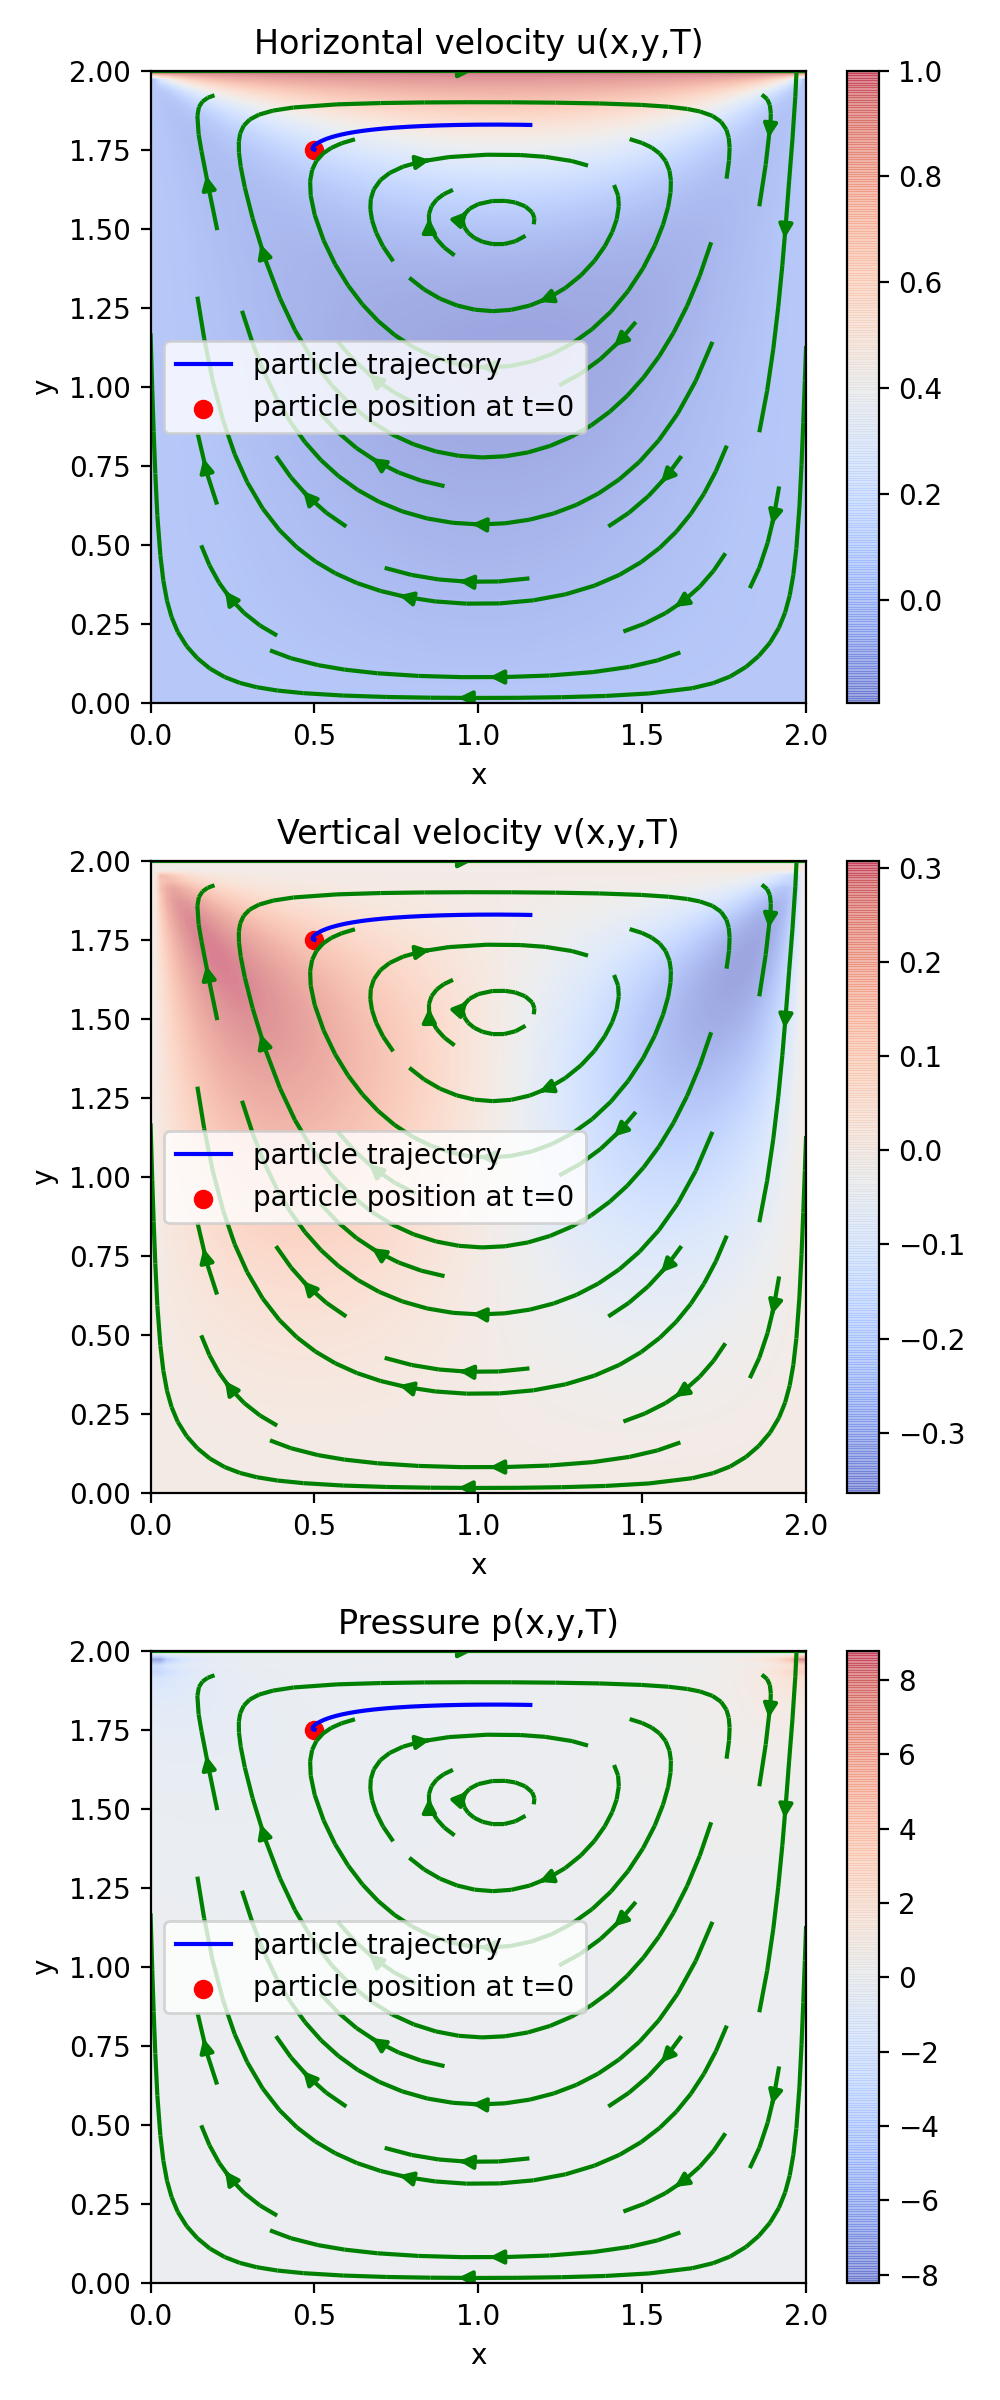

In [3]:
# Solving the Navier-Stokes equation
nt = 20000

u = np.zeros((ny, nx))
v = np.zeros((ny, nx))
p = np.zeros((ny, nx))
b = np.zeros((ny, nx))
points = np.zeros((nt, 2))

point = np.array([0.5, 1.75])
u, v, p, points = cavity_flow(nt, u, v, dt, dx, dy, p, rho, nu, point)

# Visualizing the solution
def graphComponent(f, X, Y, u, v, point, points, ax, title):
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title(title)
    ax.set_xlim(0, 2)
    ax.set_ylim(0, 2)
    graph = ax.imshow(f, cmap='coolwarm',  aspect='auto', origin='lower',
                      alpha=0.5, interpolation='bilinear', extent=[0, 2, 0, 2])
    ax.streamplot(X, Y, u, v, color='g', density=0.5)
    ax.plot(points[:, 0], points[:, 1], color='b', label='particle trajectory')
    ax.scatter(point[0], point[1], color='r', label='particle position at t=0')
    fig.colorbar(graph, ax=ax)
    ax.legend()

fig = plt.figure(figsize=(5, 12))
ax0 = fig.add_subplot(311)
graphComponent(u, X, Y, u, v, point, points, ax0, 'Horizontal velocity u(x,y,T)')
ax1 = fig.add_subplot(312)
graphComponent(v, X, Y, u, v, point, points, ax1, 'Vertical velocity v(x,y,T)')
ax2 = fig.add_subplot(313)
graphComponent(p, X, Y, u, v, point, points, ax2, 'Pressure p(x,y,T)')
plt.tight_layout()
plt.show()